In [ ]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/Bank-Marketing
# dataset link : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
# email : amirsh.nll@gmail.com

# Read data

In [1]:
import pandas as pd

DataName='bank-full.csv'
print('-----------Loading Data------------------')
data_pd = pd.read_csv(DataName)
print(data_pd.describe)



-----------Loading Data------------------
<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no  

# Preproccessing

In [3]:
print('-----------Preproccessing----------------')

from sklearn.preprocessing import LabelEncoder
import numpy as np
encoder = LabelEncoder()
dic_str={"job":1,"marital":2,"education":3,"default":4,"housing":6,"loan":7,"contact":8,"month":10,"poutcome":15,"y":16}
for col_name, col_idx in dic_str.items():
    print("colums: {0} to int".format(dic_str[col_name]))
    lbl_txt=np.array(data_pd.iloc[:,col_idx])
    data_pd[col_name]=encoder.fit_transform(lbl_txt.reshape(-1, 1))
data_pd

-----------Preproccessing----------------
colums: 1 to int
colums: 2 to int
colums: 3 to int
colums: 4 to int
colums: 6 to int
colums: 7 to int
colums: 8 to int
colums: 10 to int
colums: 15 to int
colums: 16 to int


C:\Users\Human\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# normalize

In [4]:
from sklearn import preprocessing
Data_lable=data_pd.iloc[:,-1]
Data_main=data_pd.iloc[:,:-1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Data_main)
Data_main=scaler.transform(Data_main)
print(Data_main)

[[0.51948052 0.36363636 0.5        ... 0.         0.         1.        ]
 [0.33766234 0.81818182 1.         ... 0.         0.         1.        ]
 [0.19480519 0.18181818 0.5        ... 0.         0.         1.        ]
 ...
 [0.7012987  0.45454545 0.5        ... 0.21215596 0.01090909 0.66666667]
 [0.50649351 0.09090909 0.5        ... 0.         0.         1.        ]
 [0.24675325 0.18181818 0.5        ... 0.21674312 0.04       0.33333333]]


# 'DT','KNN','NB','MLP','LR'

In [5]:
import numpy as np
import os
from pytictoc import TicToc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


def run_all_algorithm(Train_data,Test_data,Train_lable,Test_lable,str_out):
    
        
    print(np.shape(Test_data))
    print(np.shape(Train_data))
    print(np.shape(Train_lable))
    print(np.shape(Test_lable))
    
    algorithms_name=['DT','KNN','NB','MLP','LR']
    alg_num=len(algorithms_name)
    accuracy_array=np.zeros(alg_num)
    precision_array=np.zeros(alg_num)
    recall_array=np.zeros(alg_num)
    f1_score_array=np.zeros(alg_num)
    time_array=np.zeros(alg_num)

    t = TicToc()
          

    print('---------------------DT---------------------')
    K=0;
    t.tic() #Start timer
    classifier_DT = DecisionTreeClassifier(max_depth=10,random_state=0)
    classifier_DT.fit(Train_data, Train_lable)
    Test_predict = classifier_DT.predict(Test_data)
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    TimeDT=t.tocvalue() #Time elapsed since t.tic()
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeDT
    
    
    print('--------------NB----------------')
    K+=1;
    t.tic() #Start timer
    classifier = BernoulliNB()
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeNB=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeNB
    print('---------------------KNN---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=KNeighborsClassifier(n_neighbors=100)
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeKNN=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeKNN
    
    
    print('---------------------MLP---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=MLPClassifier( solver='adam', random_state=0,hidden_layer_sizes=[15,5], max_iter=200)
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeMLP=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeMLP
    
    
    print('---------------------LogisticRegression---------------------')
    K+=1;
    t.tic() #Start timer
    classifier=LogisticRegression()
    classifier.fit(Train_data, Train_lable)
    Test_predict = classifier.predict(Test_data)
    TimeLR=t.tocvalue() #Time elapsed since t.tic()
    Con_matrix=confusion_matrix(Test_lable, Test_predict)
    classfi_report=classification_report(Test_lable, Test_predict,output_dict=True)
    
    # save to array
    accuracy_array[K]=accuracy_score(Test_lable, Test_predict)
    precision_array[K]= classfi_report['macro avg']['precision'] 
    recall_array[K]= classfi_report['macro avg']['recall']    
    f1_score_array[K]= classfi_report['macro avg']['f1-score']
    time_array[K]=TimeLR
    
    
    
    
    
    

    H=6
    L=8
    
    
    
    print('--------------------result--------------------------')
    fig1=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, accuracy_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Accuracy of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(accuracy_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig1.show()
    plt.savefig(os.path.join(str_out+' accuracy.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
     
    fig2=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, precision_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Precision of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(precision_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig2.show()
    plt.savefig(os.path.join(str_out+' precision.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    
    fig3=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, recall_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('Recallof all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(recall_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig3.show()
    plt.savefig(os.path.join(str_out+' recall.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    fig4=plt.figure(figsize=(H, L)) #  
    plt.bar(algorithms_name, f1_score_array,color = ['red', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('percent%')
    plt.title('f1-score of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(f1_score_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    fig4.show()
    plt.savefig(os.path.join(str_out+' f1_score.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    
    
    
    fig5=plt.figure(figsize=(H, L)) # 
    plt.bar(algorithms_name, time_array,color = ['blue', 'green'])
    plt.xticks(algorithms_name, rotation=70)
    plt.ylabel('time(s)')
    plt.title('time of all Algorithm')
    plt.xlabel("Algoritm names")
    for i, v in enumerate(time_array):
        v=round(v,2)
        plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
    plt.savefig(os.path.join(str_out+' time.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    fig5.show()
    
    
    np.savetxt(str_out+'accuracy.csv', accuracy_array, delimiter=',')
    np.savetxt(str_out+' precision_array.csv', precision_array, delimiter=',')
    np.savetxt(str_out+'recall_array.csv', recall_array, delimiter=',')
    np.savetxt(str_out+' time_array.csv', time_array, delimiter=',')
    np.savetxt(str_out+' f1-score.csv', f1_score_array, delimiter=',')


# train_test_split

(9043, 16)
(36168, 16)
(36168,)
(9043,)
---------------------DT---------------------
--------------NB----------------
---------------------KNN---------------------
---------------------MLP---------------------
---------------------LogisticRegression---------------------
--------------------result--------------------------


<ipython-input-5-1f9a66e710f1>:142: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-5-1f9a66e710f1>:155: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
<ipython-input-5-1f9a66e710f1>:170: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
<ipython-input-5-1f9a66e710f1>:184: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()
<ipython-input-5-1f9a66e710f1>:199: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


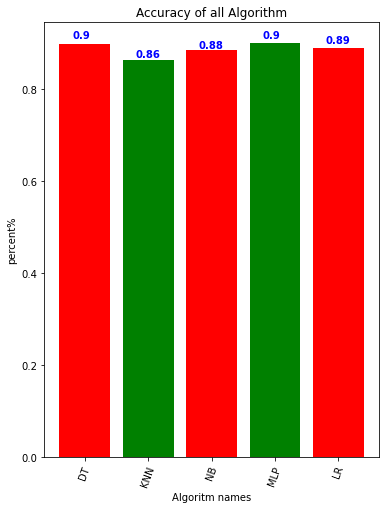

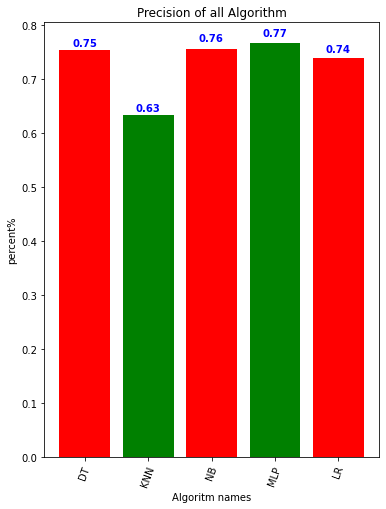

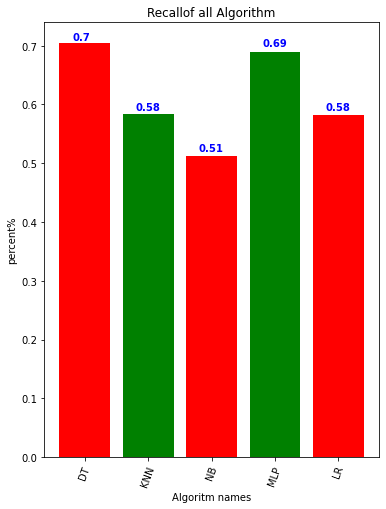

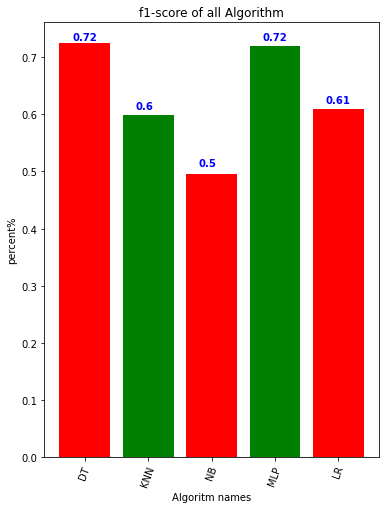

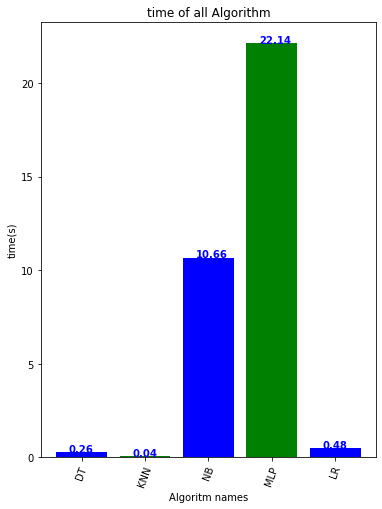

In [6]:
from sklearn.model_selection import train_test_split
Train_data, Test_data, Train_lable, Test_lable = train_test_split(Data_main, Data_lable, test_size=0.20)
run_all_algorithm(Train_data, Test_data, Train_lable, Test_lable ,"")